<a href="https://colab.research.google.com/github/JencyCS/DataScience/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheth L.U.J and Sir M.V. College

Jency Nadar T095

ANOVA (F-TEST)

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv('plant_growth_data.csv')

# Prepare data for ANOVA
groups = df.groupby('Soil_Type')['Growth_Milestone'].apply(list)

# Perform ANOVA
F, p = stats.f_oneway(*groups)

# Output results
print("F-statistic:", F)
print("p-value for significance:", p)

# Hypothesis testing
if p < 0.05:
    print("Reject null hypothesis: There is a significant effect of soil type on growth milestones.")
else:
    print("Accept null hypothesis: There is no significant effect of soil type on growth milestones.")


F-statistic: 0.9048693430949982
p-value for significance: 0.40633103259234615
Accept null hypothesis: There is no significant effect of soil type on growth milestones.


Two Way F-test

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load your dataset
df = pd.read_csv('plant_growth_data.csv')

# Fit the model using OLS
model = ols('Growth_Milestone ~ C(Fertilizer_Type) * C(Water_Frequency)', df).fit()

# Print overall model results
print(f"Overall model F({model.df_model: .0f}, {model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Perform ANOVA
res = sm.stats.anova_lm(model, typ=2)
print(res)


Overall model F( 8,  184) =  3.085, p =  0.0027
                                          sum_sq     df          F    PR(>F)
C(Fertilizer_Type)                      5.460550    2.0  11.808719  0.000015
C(Water_Frequency)                      0.025225    2.0   0.054551  0.946926
C(Fertilizer_Type):C(Water_Frequency)   0.212681    4.0   0.229967  0.921304
Residual                               42.542351  184.0        NaN       NaN


One-Way ANOVA and Post-Hoc Tests

   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

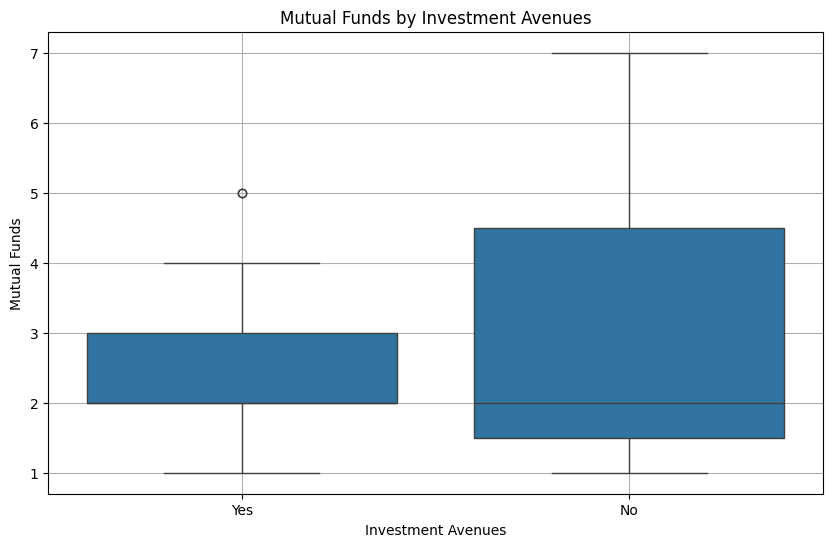

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Step 3: Load the dataset
data = pd.read_csv('Finance_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Step 4: Explore the data
print(data.describe())
print(data.info())

# Step 5: Perform One-Way ANOVA
# Assuming 'Mutual_Funds' is the dependent variable and 'Investment_Avenues' is the independent variable
anova_result = stats.f_oneway(
    data[data['Investment_Avenues'] == 'Yes']['Mutual_Funds'],
    data[data['Investment_Avenues'] == 'No']['Mutual_Funds']
)

# Display the ANOVA result
print(f'F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

# Step 6: Check ANOVA result
if anova_result.pvalue < 0.05:
    print("Significant differences exist between the groups.")
else:
    print("No significant differences between the groups.")

# Step 7: Conduct Post-Hoc Tests
# Perform Tukey's HSD test if ANOVA is significant
if anova_result.pvalue < 0.05:
    tukey_result = pairwise_tukeyhsd(endog=data['Mutual_Funds'], groups=data['Investment_Avenues'], alpha=0.05)
    print(tukey_result)

# Step 8: Visualize the Results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Investment_Avenues', y='Mutual_Funds', data=data)
plt.title('Mutual Funds by Investment Avenues')
plt.xlabel('Investment Avenues')
plt.ylabel('Mutual Funds')
plt.grid()
plt.show()
